In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from mtcnn import MTCNN

In [2]:
IMG_PATH = "data/Medical Mask/images"

In [3]:
# Load model
model = load_model('models/facemask_detector_model.keras')

# Model Summary
# model.summary()

In [4]:
def get_image_path(image_name):
    return os.path.join(IMG_PATH, image_name)

def get_roi(img, roi_size, xmin, ymin, xmax, ymax):
    roi = img[ymin:ymax, xmin:xmax]
    roi = cv2.resize(roi, roi_size)
    return cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

In [5]:
train = pd.read_csv("fixed_train.csv")
train.head()

,name,x1,y1,x2,y2,classname
0,2756.png,69,126,294,392,1
1,2756.png,505,10,723,283,1
2,6098.jpg,360,85,728,653,0
3,6427.png,278,386,582,582,1
4,4591.png,239,9,522,342,1


In [6]:
# Does not work with side faces
face_cascade = cv2.CascadeClassifier('cv/haarcascade_frontalface_default.xml')

# Still isn't great with face detection but better than haarcascade
face_detector = MTCNN()

def detect_faces(frame):
    # Convert frame to RGB (MTCNN requires RGB format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Detect faces in the frame
    detections = face_detector.detect_faces(rgb_frame)
    
    # Extract bounding boxes from the detections
    face_bboxes = [(d['box'][0], d['box'][1], d['box'][0] + d['box'][2], d['box'][1] + d['box'][3])
                   for d in detections]
    
    return face_bboxes

In [46]:
x = train.iloc[600]
img = cv2.imread(get_image_path(x["name"]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.9432408]


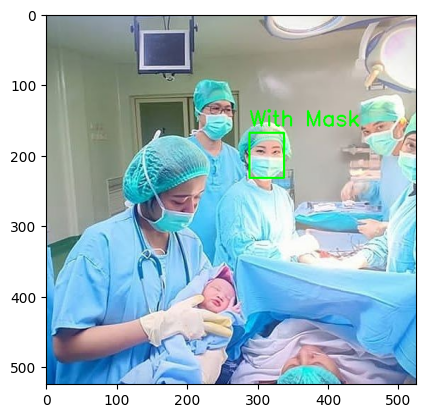

In [47]:
faces = detect_faces(img)
for (x1, y1, x2, y2) in faces:
    face_roi = img[y1:y2, x1:x2]
    face_resized = cv2.resize(face_roi, (100, 100))
    face_resized = np.reshape(face_resized, (1,100,100,3))

    prediction = model.predict(face_resized)
    print(prediction[0])

    if prediction[0][0] > 0.5:
        predicted_class = "With Mask"
    else:
        predicted_class = "No Mask"

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"{predicted_class}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

if len(faces) == 0:
    print("No Faces")

plt.imshow(img)
